<a href="https://colab.research.google.com/github/maciekpiotrowski/playground/blob/master/ML_Mastery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install Theano
import theano
from theano import tensor
# declare two symbolic floating-point scalars
a = tensor.dscalar()
b = tensor.dscalar()
# create a simple expression
c = a + b
# convert the expression into a callable object that takes (a,b)
# values as input and computes a value for c
f = theano.function([a,b], c)
# bind 1.5 to 'a', 2.5 to 'b', and evaluate 'c'
result = f(1.5, 2.5)
print(result)

4.0


In [0]:
print(c)

Elemwise{add,no_inplace}.0


In [0]:
%whos

Variable   Type              Data/Info
--------------------------------------
a          TensorVariable    <TensorType(float64, scalar)>
b          TensorVariable    <TensorType(float64, scalar)>
c          TensorVariable    Elemwise{add,no_inplace}.0
f          Function          <theano.compile.function_<...>object at 0x7f278a9646a0>
result     ndarray           : 1 elems, type `float64`, 8 bytes
tensor     module            <module 'theano.tensor' f<...>eano/tensor/__init__.py'>
theano     module            <module 'theano' from '/u<...>ages/theano/__init__.py'>


In [0]:
# Example of TensorFlow library
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# declare two symbolic floating-point scalars
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
# create a simple symbolic expression using the add function
add = tf.add(a, b)
# bind 1.5 to 'a', 2.5 to 'b', and evaluate 'c'
sess = tf.Session()
binding = {a: 1.5, b: 2.5}
c = sess.run(add, feed_dict=binding)
print(c)

Instructions for updating:
non-resource variables are not supported in the long term
4.0


XGBoost example

In [4]:
cd drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [7]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train,verbose=True)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


In [6]:
# exmaple of early stopping
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.61224
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.519769
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


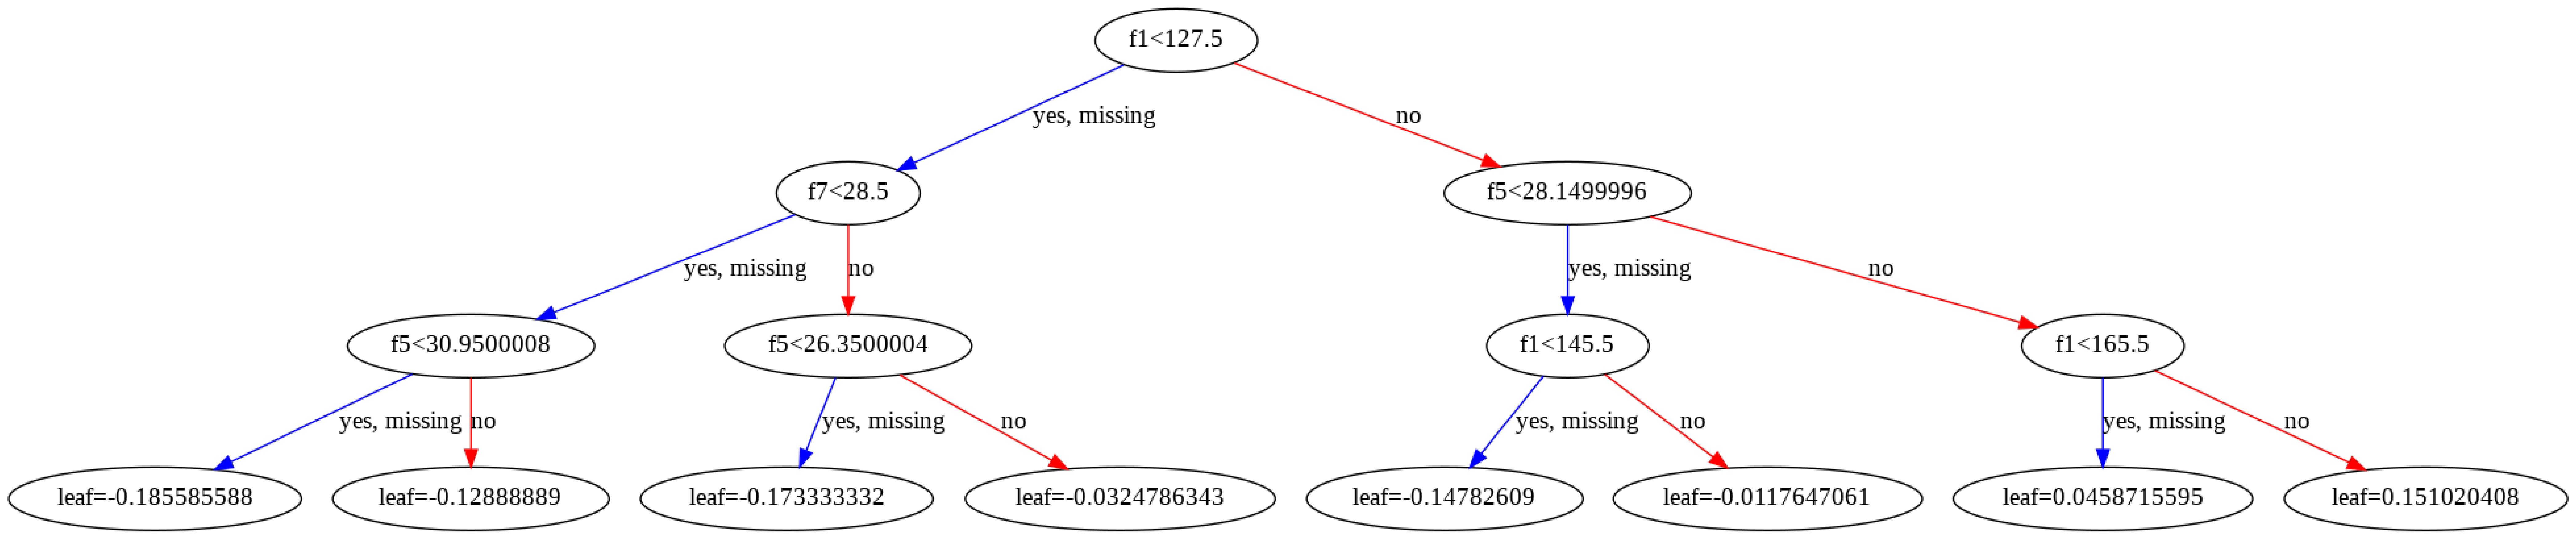

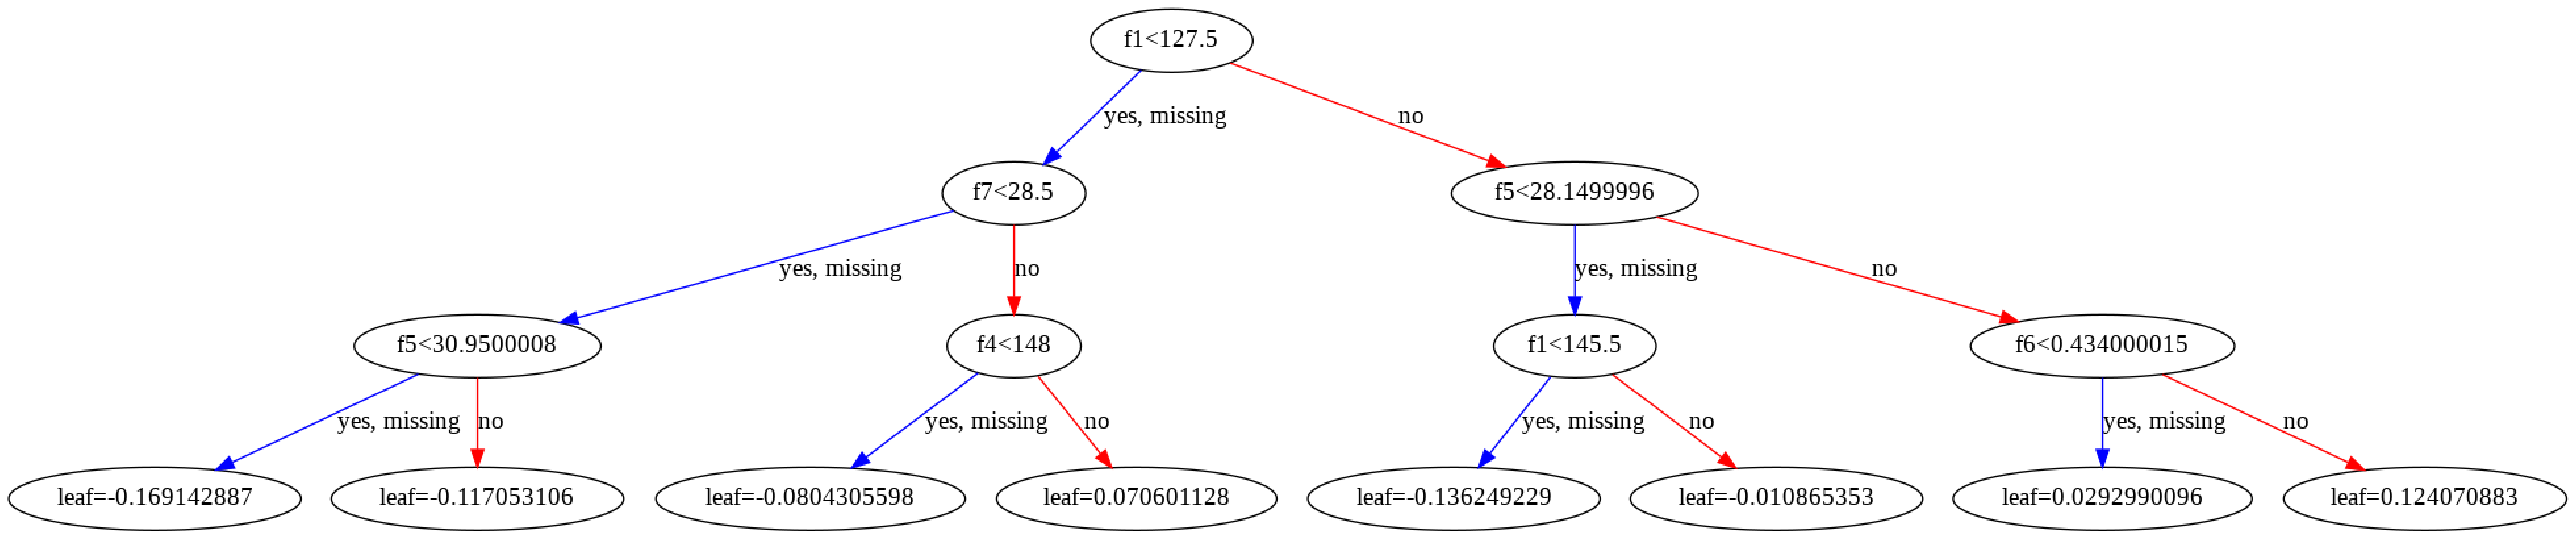

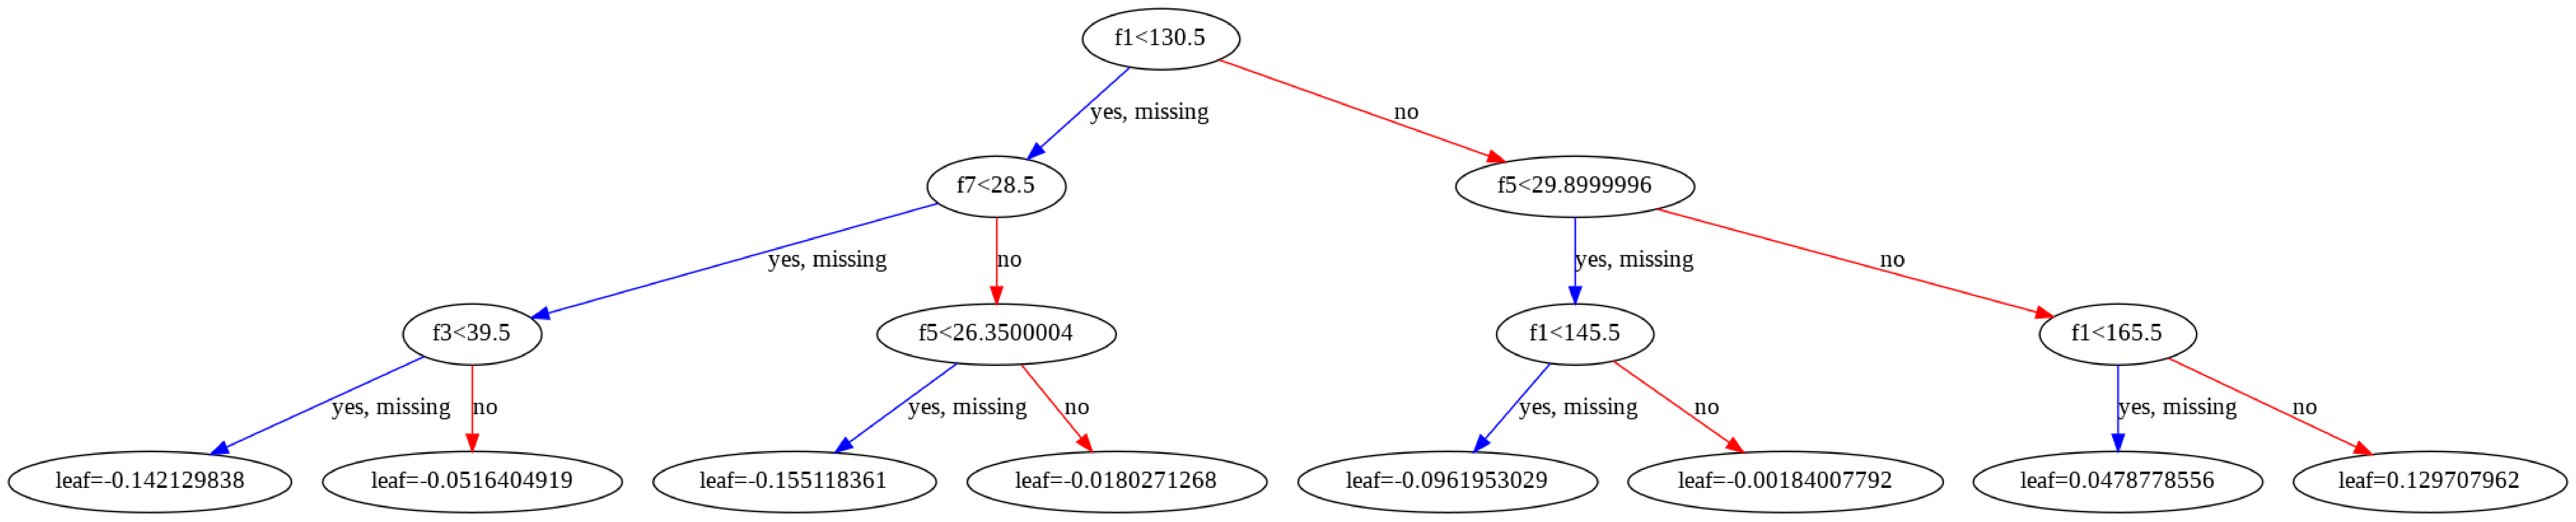

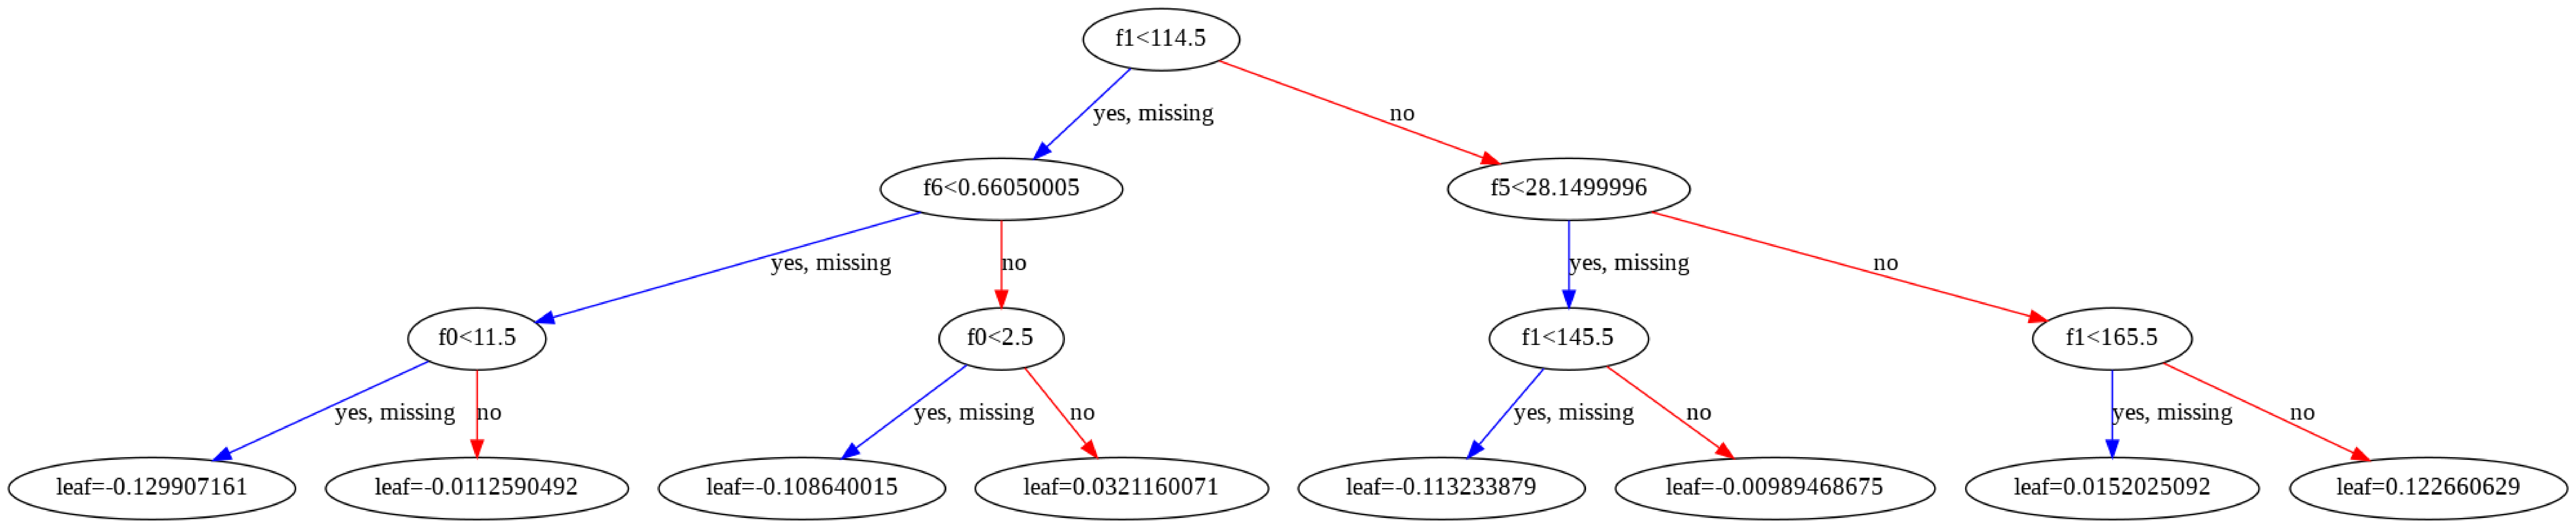

KeyboardInterrupt: ignored

In [36]:
#sum(model.feature_importances_)
from xgboost import plot_tree
import matplotlib.pyplot as plt
for tree_num in range (0,model.get_num_boosting_rounds()): 
  fig=plot_tree(model,num_trees=tree_num)
  fig = plt.gcf()
  fig.set_size_inches(150, 100)
  plt.show()

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


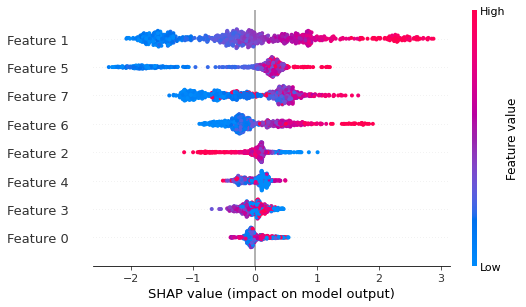

In [28]:
!pip install shap
import shap
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X)

In [32]:
model.get_num_boosting_rounds()

100